In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
colors_df = pd.read_csv("./data/colors.csv")
colors_df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [4]:
colors_df.nunique()

id          135
name        135
rgb         124
is_trans      2
dtype: int64

In [5]:
colors_df.groupby("is_trans").value_counts()

is_trans  id     name                    rgb   
f         -1     Unknown                 0033B2    1
           313   Maersk Blue             3592C3    1
           450   Fabuland Brown          B67B50    1
           383   Chrome Silver           E0E0E0    1
           379   Sand Blue               6074A1    1
                                                  ..
t          35    Trans-Bright Green      D9E4A7    1
           34    Trans-Green             84B68D    1
           33    Trans-Dark Blue         0020A0    1
           32    Trans-Black IR Lens     635F52    1
           1006  Trans Light Royal Blue  B4D4F7    1
Name: count, Length: 135, dtype: int64

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://i.imgur.com/aKcwkSx.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png">

In [6]:
sets = pd.read_csv("./data/sets.csv")

In [7]:
sets.head()


,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [8]:
sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


In [12]:
sets.sort_values("year").head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [13]:
sets[sets["year"]==1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [16]:
sets.sort_values("num_parts",ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


In [37]:
sets_by_year = sets.groupby("year").count()
sets_by_year["set_num"].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

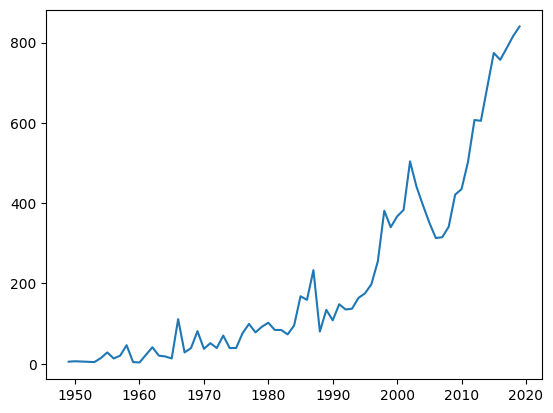

In [41]:
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

In [44]:
themes_by_year = sets.groupby("year").agg({'theme_id':pd.Series.nunique})
themes_by_year.rename(columns={'theme_id':'nr_themes'}, inplace=True)
themes_by_year

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


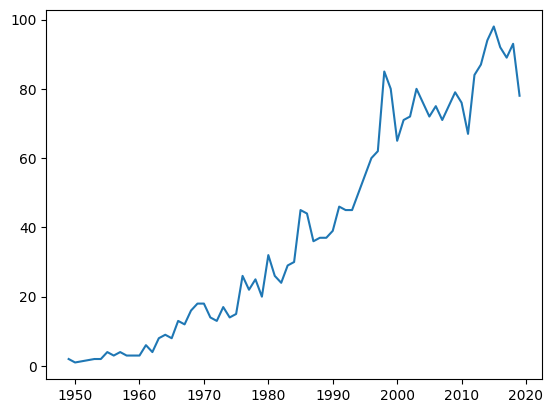

In [48]:
plt.plot(themes_by_year.index[:-2],themes_by_year.nr_themes[:-2])

Text(0, 0.5, 'Number Of Themes')

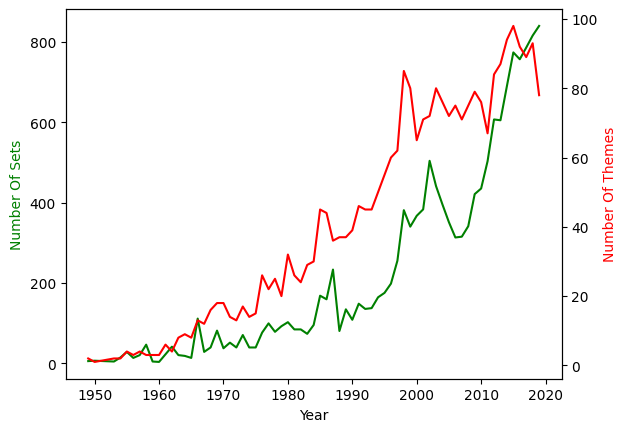

In [51]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(sets_by_year.index[:-2],sets_by_year.set_num[:-2],color="green")
ax2.plot(themes_by_year.index[:-2],themes_by_year.nr_themes[:-2],color="red")

ax1.set_xlabel("Year")
ax1.set_ylabel("Number Of Sets", color="green")
ax2.set_ylabel("Number Of Themes", color="red")

In [52]:
parts_per_set = sets.groupby("year").agg({'num_parts':pd.Series.mean})
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [54]:
parts_per_set.tail()

,num_parts
year,
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938
2021,0.000000


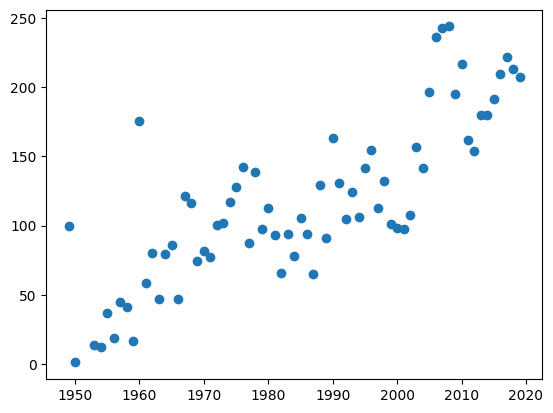

In [55]:
plt.scatter(parts_per_set.index[:-2],parts_per_set.num_parts[:-2])

In [56]:
set_theme_count = sets["theme_id"].value_counts()
set_theme_count.head()

theme_id
158    753
501    656
494    398
435    356
503    329
Name: count, dtype: int64

**Database Schema**


<img src="https://i.imgur.com/Sg4lcjx.png">

In [58]:
themes = pd.read_csv("./data/themes.csv")
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [59]:
themes[themes.name=="Star Wars"]

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [62]:
sets[sets.theme_id == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


In [66]:
set_theme_count = sets['theme_id'].value_counts()
set_theme_count[:5]

theme_id
158    753
501    656
494    398
435    356
503    329
Name: count, dtype: int64

In [67]:
set_theme_count = pd.DataFrame({'id':set_theme_count.index, 'set_count':set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [68]:
merged_df = pd.merge(set_theme_count, themes, on="id")
merged_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


<BarContainer object of 10 artists>

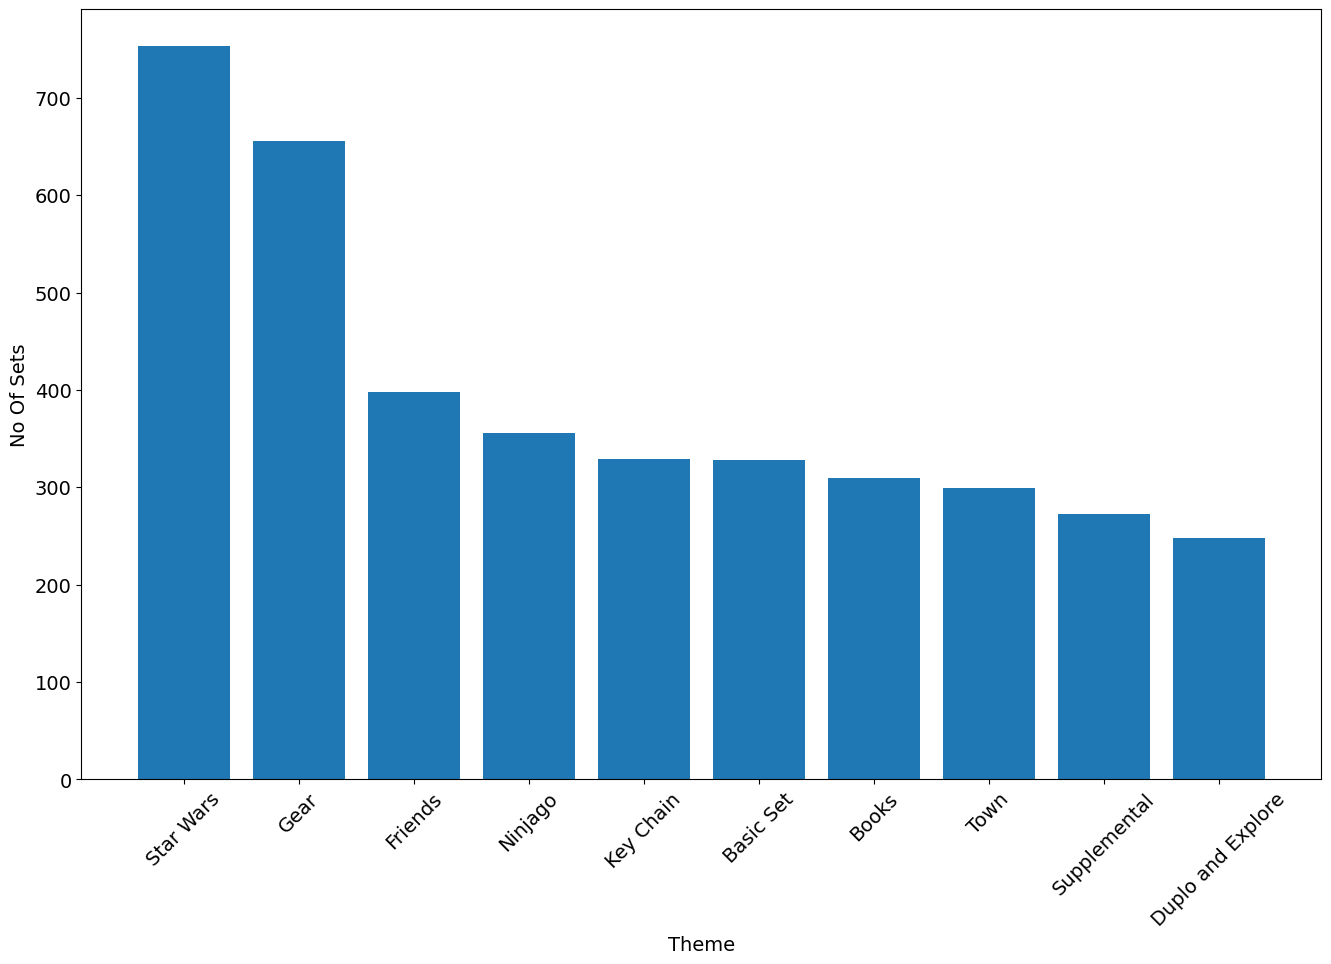

In [72]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel("No Of Sets", fontsize=14)
plt.xlabel("Theme", fontsize=14)

plt.bar(merged_df.name[:10],merged_df.set_count[:10])